<a href="https://colab.research.google.com/github/soumyabrataroy/StockPriceForecast/blob/main/Copy_of_Stock_Price_Forecast_V3_without_MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=054a9fefbad066f0ed358afe9aadedb608bd4f0f28c9873a54472d8687bb64e2
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Getting Stock Price

In [ ]:
# Importing different libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

# used Reliance industries stock price 
data = yf.Ticker('BANDHANBNK.NS')

# get historical market data of stock from the begining
hist_stock = data.history(period="max")

Getting SENSEX data

In [ ]:
# Sensex Ticker is '^BSESN' in Yahoo Finance website
data = yf.Ticker('^BSESN')

# get historical market data of stock
hist_sensex = data.history(period="max")

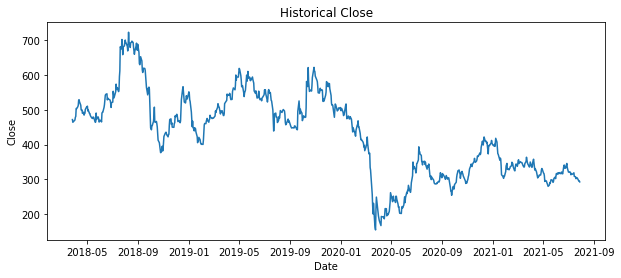

In [ ]:
# Here I have visualizes the stock data for Reliance
plt.figure(figsize=(10,4))
plt.plot(hist_stock.index, hist_stock['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Historical Close");

**Stock Price Data**

In [ ]:
hist_stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-23,304.916577,308.404754,302.175866,304.019592,3836967.0,0.0,0
2021-07-26,304.019593,305.763682,295.996796,296.744263,5260125.0,0.0,0
2021-07-27,298.986666,300.780574,291.711336,294.701202,4558881.0,0.0,0
2021-07-28,295.996791,297.990035,291.661478,295.049988,3325304.0,0.0,0
2021-07-29,298.750000,298.750000,291.649994,292.500000,4365097.0,0.0,0


SENSEX Data

In [ ]:
hist_sensex.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0


Create Merged Data

In [ ]:
# for simplicity, took only Stock 'Close' and 'Volume' data
stock_close = hist_stock[['Close','Volume']]

# for simplicity, took only Sensex 'Close' and 'Volume' data
sensex_close = hist_sensex[['Close','Volume']]

#Inner Join the above two data tables
merged_data = pd.merge(stock_close, sensex_close, on =None, how ='inner', left_index=True, right_index=True, suffixes=('_stock', '_sensex'))

In [ ]:
merged_data.tail()

,Close_stock,Volume_stock,Close_sensex,Volume_sensex
Date,,,,
2021-07-23,304.019592,3836967.0,52975.800781,12100
2021-07-26,296.744263,5260125.0,52852.269531,20900
2021-07-27,294.701202,4558881.0,52578.761719,6300
2021-07-28,295.049988,3325304.0,52443.710938,8000
2021-07-29,292.500000,4365097.0,52653.070312,0


**Getting only Stock close, sensex data**

In [ ]:
data = merged_data[['Close_stock','Close_sensex']]

In [ ]:
# Null value check
data.isnull().sum()

Close_stock     0
Close_sensex    0
dtype: int64

200 Days Moving Average

In [ ]:
data.insert(loc=1,column='200_MA_stock', value = data['Close_stock'].rolling(200).mean())

21 Days Moving Average

In [ ]:
data.insert(loc=1,column='21_MA_stock', value = data['Close_stock'].rolling(21).mean())

13 Days Moving Average

In [ ]:
data.insert(loc=1,column='13_MA_stock', value = data['Close_stock'].rolling(13).mean())

5 Days Moving Average

In [ ]:
data.insert(loc=1,column='5_MA_stock', value = data['Close_stock'].rolling(5).mean())

In [ ]:
data.head()

,Close_stock,5_MA_stock,13_MA_stock,21_MA_stock,200_MA_stock,Close_sensex
Date,,,,,,
2018-03-27,471.783356,NaN,NaN,NaN,NaN,33174.390625
2018-03-28,464.066223,NaN,NaN,NaN,NaN,32968.679688
2018-04-02,470.645599,NaN,NaN,NaN,NaN,33255.359375
2018-04-03,478.313232,NaN,NaN,NaN,NaN,33370.628906
2018-04-04,480.885590,473.1388,NaN,NaN,NaN,33019.070312


Creating the RSI indicator

In [ ]:
change = data['Close_stock'].diff(1)


is_gain, is_loss = change > 0, change < 0
gain, loss = change, -change


gain[is_loss] = 0
loss[is_gain] = 0


gain.name = 'gain'
loss.name = 'loss'


n = 14
avg_gain = change * np.nan
avg_loss = change * np.nan


avg_gain[n] = gain[:n+1].mean()
avg_loss[n] = loss[:n+1].mean()


avg_gain.name = 'avg_gain'
avg_loss.name = 'avg_loss'


avg_df = pd.concat([gain, loss, avg_gain, avg_loss], axis=1)
print(avg_df.iloc[:16,:])

                 gain       loss  avg_gain  avg_loss
Date                                                
2018-03-27        NaN        NaN       NaN       NaN
2018-03-28   0.000000   7.717133       NaN       NaN
2018-04-02   6.579376   0.000000       NaN       NaN
2018-04-03   7.667633   0.000000       NaN       NaN
2018-04-04   2.572357   0.000000       NaN       NaN
2018-04-05  22.904053   0.000000       NaN       NaN
2018-04-06   0.000000   0.939911       NaN       NaN
2018-04-09   6.134125   0.000000       NaN       NaN
2018-04-10   4.155426   0.000000       NaN       NaN
2018-04-11  14.692200   0.000000       NaN       NaN
2018-04-12   1.236694   0.000000       NaN       NaN
2018-04-13   0.000000   6.035217       NaN       NaN
2018-04-16   0.000000   9.745361       NaN       NaN
2018-04-17   0.000000  13.554413       NaN       NaN
2018-04-18   0.000000   0.939880  4.710133  2.780851
2018-04-19   0.939880   0.000000       NaN       NaN


In [ ]:
period = n


# used (len(avg_df)-1) because if I use len(avg_df), the assigning value will be out of bound
for n in range(period,len(avg_df)-1):
    
    avg_df['avg_gain'][n+1] = (((avg_df['avg_gain'][n])*(period-1))+(avg_df['gain'][n+1]))/period
    avg_df['avg_loss'][n+1] = (((avg_df['avg_loss'][n])*(period-1))+(avg_df['loss'][n+1]))/period

In [ ]:
avg_df.tail(10)

,gain,loss,avg_gain,avg_loss
Date,,,,
2021-07-15,1.793915,0.000000,1.807926,1.906898
2021-07-16,0.000000,10.514374,1.678788,2.521718
2021-07-19,0.000000,0.747467,1.558875,2.394986
2021-07-20,0.000000,5.730560,1.447527,2.633241
2021-07-22,2.242401,0.000000,1.504304,2.445152
2021-07-23,0.149475,0.000000,1.407530,2.270499
2021-07-26,0.000000,7.275330,1.306992,2.627987
2021-07-27,0.000000,2.043060,1.213636,2.586206
2021-07-28,0.348785,0.000000,1.151861,2.401477


In [ ]:
avg_df['Relative Strength'] = avg_df['avg_gain']/avg_df['avg_loss']
avg_df['RSI'] = avg_df['Relative Strength'].apply(lambda x: 100-(100/(x+1)))
avg_df

,gain,loss,avg_gain,avg_loss,Relative Strength,RSI
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-28,0.000000,7.717133,NaN,NaN,NaN,NaN
2018-04-02,6.579376,0.000000,NaN,NaN,NaN,NaN
2018-04-03,7.667633,0.000000,NaN,NaN,NaN,NaN
2018-04-04,2.572357,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-07-23,0.149475,0.000000,1.407530,2.270499,0.619921,38.268599
2021-07-26,0.000000,7.275330,1.306992,2.627987,0.497336,33.214720
2021-07-27,0.000000,2.043060,1.213636,2.586206,0.469273,31.939109


In [ ]:
# quickly inserting the RSI values in the main data frame
data.insert(loc=2,column='RSI', value = avg_df['RSI'])
data

,Close_stock,5_MA_stock,RSI,13_MA_stock,21_MA_stock,200_MA_stock,Close_sensex
Date,,,,,,,
2018-03-27,471.783356,NaN,NaN,NaN,NaN,NaN,33174.390625
2018-03-28,464.066223,NaN,NaN,NaN,NaN,NaN,32968.679688
2018-04-02,470.645599,NaN,NaN,NaN,NaN,NaN,33255.359375
2018-04-03,478.313232,NaN,NaN,NaN,NaN,NaN,33370.628906
2018-04-04,480.885590,473.138800,NaN,NaN,NaN,NaN,33019.070312
...,...,...,...,...,...,...,...
2021-07-23,304.019592,304.996289,38.268599,312.184237,319.004527,335.628473,52975.800781
2021-07-26,296.744263,302.723993,33.214720,310.447815,317.312642,335.749065,52852.269531
2021-07-27,294.701202,300.192578,31.939109,308.542736,315.542453,335.862181,52578.761719


In [ ]:
#removing Null values from the data
data  = data.dropna()
data

,Close_stock,5_MA_stock,RSI,13_MA_stock,21_MA_stock,200_MA_stock,Close_sensex
Date,,,,,,,
2019-01-17,445.756927,445.717285,37.730863,481.502115,502.826653,526.661580,36374.078125
2019-01-18,436.242157,442.892590,35.547240,473.115699,496.627421,526.483874,36386.609375
2019-01-21,422.812469,439.602063,32.673004,463.543750,490.501344,526.277605,36578.960938
2019-01-22,405.319183,430.959485,29.344608,454.025170,484.429548,525.950973,36444.640625
2019-01-23,410.522583,424.130664,31.577388,445.280428,479.115249,525.612020,36108.468750
...,...,...,...,...,...,...,...
2021-07-23,304.019592,304.996289,38.268599,312.184237,319.004527,335.628473,52975.800781
2021-07-26,296.744263,302.723993,33.214720,310.447815,317.312642,335.749065,52852.269531
2021-07-27,294.701202,300.192578,31.939109,308.542736,315.542453,335.862181,52578.761719


In [ ]:
#rearranging the data for the model
new_data = data[['Close_sensex','RSI','200_MA_stock','21_MA_stock','13_MA_stock','5_MA_stock','Close_stock']]

In [ ]:
new_data.tail(10)

,Close_sensex,RSI,200_MA_stock,21_MA_stock,13_MA_stock,5_MA_stock,Close_stock
Date,,,,,,,
2021-07-15,53158.851562,48.667874,334.659259,324.787308,320.341205,316.317926,318.620117
2021-07-16,53140.058594,39.966335,334.867054,324.324591,318.298131,314.803058,308.105743
2021-07-19,52553.398438,39.426654,335.068621,323.933060,316.623037,313.357953,307.358276
2021-07-20,52198.511719,35.471922,335.307063,322.105921,314.809953,310.507611,301.627716
2021-07-22,52837.210938,38.088880,335.505889,320.338103,313.525844,307.916394,303.870117
2021-07-23,52975.800781,38.268599,335.628473,319.004527,312.184237,304.996289,304.019592
2021-07-26,52852.269531,33.214720,335.749065,317.312642,310.447815,302.723993,296.744263
2021-07-27,52578.761719,31.939109,335.862181,315.542453,308.542736,300.192578,294.701202
2021-07-28,52443.710938,32.416299,335.913507,313.138694,307.158964,298.877032,295.049988


In [ ]:
val_len = 20
test_len = 10

Training set

In [ ]:
#getting the all the data except last 5 values
training_set = new_data.iloc[:-(val_len + test_len),:].values
training_set.shape

(589, 7)

In [ ]:
training_set

array([[3.63740781e+04, 3.77308631e+01, 5.26661580e+02, ...,
        4.81502115e+02, 4.45717285e+02, 4.45756927e+02],
       [3.63866094e+04, 3.55472395e+01, 5.26483874e+02, ...,
        4.73115699e+02, 4.42892590e+02, 4.36242157e+02],
       [3.65789609e+04, 3.26730039e+01, 5.26277605e+02, ...,
        4.63543750e+02, 4.39602063e+02, 4.22812469e+02],
       ...,
       [5.25515312e+04, 5.52226118e+01, 3.32128337e+02, ...,
        3.11551772e+02, 3.17035492e+02, 3.15779755e+02],
       [5.27730508e+04, 5.90023206e+01, 3.32294524e+02, ...,
        3.13591013e+02, 3.18121808e+02, 3.20862518e+02],
       [5.25019805e+04, 5.79183486e+01, 3.32438037e+02, ...,
        3.14924953e+02, 3.18799512e+02, 3.19816071e+02]])

Test Set

In [ ]:
#getting only last 2 values of the dataset
test_set = new_data.iloc[len(new_data)-test_len:,:].values
test_set.shape

(10, 7)

In [ ]:
test_set

array([[5.31588516e+04, 4.86678744e+01, 3.34659259e+02, 3.24787308e+02,
        3.20341205e+02, 3.16317926e+02, 3.18620117e+02],
       [5.31400586e+04, 3.99663347e+01, 3.34867054e+02, 3.24324591e+02,
        3.18298131e+02, 3.14803058e+02, 3.08105743e+02],
       [5.25533984e+04, 3.94266539e+01, 3.35068621e+02, 3.23933060e+02,
        3.16623037e+02, 3.13357953e+02, 3.07358276e+02],
       [5.21985117e+04, 3.54719217e+01, 3.35307063e+02, 3.22105921e+02,
        3.14809953e+02, 3.10507611e+02, 3.01627716e+02],
       [5.28372109e+04, 3.80888795e+01, 3.35505889e+02, 3.20338103e+02,
        3.13525844e+02, 3.07916394e+02, 3.03870117e+02],
       [5.29758008e+04, 3.82685987e+01, 3.35628473e+02, 3.19004527e+02,
        3.12184237e+02, 3.04996289e+02, 3.04019592e+02],
       [5.28522695e+04, 3.32147202e+01, 3.35749065e+02, 3.17312642e+02,
        3.10447815e+02, 3.02723993e+02, 2.96744263e+02],
       [5.25787617e+04, 3.19391092e+01, 3.35862181e+02, 3.15542453e+02,
        3.08542736e+02, 3

Validation Data

In [ ]:
#getting only 3 values before last 2 test data of the dataset
val_set = new_data.iloc[len(new_data)- (val_len + test_len):-test_len,:].values
val_set.shape

(20, 7)

In [ ]:
val_set

array([[5.23233281e+04, 5.58149124e+01, 3.32557383e+02, 3.08682376e+02,
        3.15806580e+02, 3.18520459e+02, 3.17822815e+02],
       [5.23444492e+04, 5.34625831e+01, 3.32673240e+02, 3.09752558e+02,
        3.16864532e+02, 3.17972314e+02, 3.15580414e+02],
       [5.25744609e+04, 6.88549352e+01, 3.32888012e+02, 3.11722072e+02,
        3.19122263e+02, 3.22815894e+02, 3.39997650e+02],
       [5.25887109e+04, 6.93012601e+01, 3.33042738e+02, 3.13784130e+02,
        3.20996678e+02, 3.26842249e+02, 3.40994293e+02],
       [5.23060781e+04, 6.08496703e+01, 3.33108017e+02, 3.15637373e+02,
        3.22399616e+02, 3.29283972e+02, 3.32024689e+02],
       [5.26990000e+04, 6.09919738e+01, 3.33245550e+02, 3.17597396e+02,
        3.23426903e+02, 3.32174176e+02, 3.32273834e+02],
       [5.29250391e+04, 6.06123391e+01, 3.33380094e+02, 3.19384196e+02,
        3.24691845e+02, 3.35433130e+02, 3.31875183e+02],
       [5.27355898e+04, 6.79666112e+01, 3.33525601e+02, 3.21434390e+02,
        3.26930413e+02, 3

In [ ]:
day = 5
column = 7
week = day

Feature Scaling

In [ ]:
#using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
# scaling training set
training_set_scaled = sc.fit_transform(training_set)

sc_output = MinMaxScaler(feature_range = (0,1))
#scaling training Stock price only
output = sc_output.fit_transform(training_set[:,column-1].reshape(-1,1))

Arrenging X_train, Y_train

In [ ]:
#arrenging the data as per the above logic [28 days data to predict the next day data]
tr = len(training_set)

X_train = []
y_train = []
for i in range(week, tr):
  X_train.append(training_set_scaled[i-week:i,0:column])
  y_train.append(training_set_scaled[i,column-1])
X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train,y_train

(array([[[0.387911  , 0.36370839, 0.99274787, ..., 0.72625441,
          0.61913922, 0.6230409 ],
         [0.38837872, 0.33068659, 0.99197903, ..., 0.70525579,
          0.6124636 , 0.60270647],
         [0.39555821, 0.28722103, 0.99108661, ..., 0.68128873,
          0.60468707, 0.57400529],
         [0.39054473, 0.23688743, 0.98967345, ..., 0.65745529,
          0.584262  , 0.53661961],
         [0.37799717, 0.2706526 , 0.98820697, ..., 0.63555946,
          0.5681234 , 0.54774003]],
 
        [[0.38837872, 0.33068659, 0.99197903, ..., 0.70525579,
          0.6124636 , 0.60270647],
         [0.39555821, 0.28722103, 0.99108661, ..., 0.68128873,
          0.60468707, 0.57400529],
         [0.39054473, 0.23688743, 0.98967345, ..., 0.65745529,
          0.584262  , 0.53661961],
         [0.37799717, 0.2706526 , 0.98820697, ..., 0.63555946,
          0.5681234 , 0.54774003],
         [0.38123072, 0.26972569, 0.98667842, ..., 0.61949553,
          0.55132894, 0.54710452]],
 
        [[0.39

Arrenging X Val, y Val

In [ ]:
inputs = new_data.iloc[len(new_data)-(test_len+val_len)-week:-test_len, :].values
inputs = sc.transform(inputs)
X_val = []
y_val = []
for i in range(week, len(inputs)):
  X_val.append(inputs[i-week:i,0:column])
  y_val.append(inputs[i,column-1])
X_val,y_val = np.array(X_val), np.array(y_val)

In [ ]:
X_val,y_val

(array([[[0.98236095, 0.67854731, 0.14984054, 0.27377698, 0.29111085,
          0.31436513, 0.35260913],
         [0.98886641, 0.66557121, 0.1505175 , 0.27761053, 0.29596733,
          0.31650847, 0.35069224],
         [0.99173182, 0.62822699, 0.15110392, 0.28206359, 0.30071825,
          0.31502463, 0.34526094],
         [1.        , 0.68538555, 0.15182292, 0.28668225, 0.30582427,
          0.31759193, 0.35612354],
         [0.98988234, 0.66899321, 0.15244383, 0.29032566, 0.3091643 ,
          0.31919355, 0.35388713]],
 
        [[0.98886641, 0.66557121, 0.1505175 , 0.27761053, 0.29596733,
          0.31650847, 0.35069224],
         [0.99173182, 0.62822699, 0.15110392, 0.28206359, 0.30071825,
          0.31502463, 0.34526094],
         [1.        , 0.68538555, 0.15182292, 0.28668225, 0.30582427,
          0.31759193, 0.35612354],
         [0.98988234, 0.66899321, 0.15244383, 0.29032566, 0.3091643 ,
          0.31919355, 0.35388713],
         [0.98321417, 0.63718404, 0.15296017, 0.2939

In [ ]:
inputs = new_data.iloc[len(new_data)-test_len-week:, :].values
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(week, len(inputs)):
  X_test.append(inputs[i-week:i,0:column])
  y_test.append(inputs[i,column-1])
X_test,y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test,y_test

(array([[[0.99238165, 0.44490781, 0.1599648 , 0.33708271, 0.34219991,
          0.31912287, 0.33940362],
         [0.98556054, 0.48059782, 0.16024614, 0.33664722, 0.33732423,
          0.31681465, 0.34504793],
         [0.98505665, 0.46808309, 0.1604736 , 0.33618719, 0.333965  ,
          0.31356431, 0.34270501],
         [0.99987607, 0.48704292, 0.16072476, 0.33619946, 0.33080733,
          0.31193914, 0.34547395],
         [1.00488955, 0.50137039, 0.16113762, 0.33570263, 0.32790879,
          0.31069084, 0.34749735]],
 
        [[0.98556054, 0.48059782, 0.16024614, 0.33664722, 0.33732423,
          0.31681465, 0.34504793],
         [0.98505665, 0.46808309, 0.1604736 , 0.33618719, 0.333965  ,
          0.31356431, 0.34270501],
         [0.99987607, 0.48704292, 0.16072476, 0.33619946, 0.33080733,
          0.31193914, 0.34547395],
         [1.00488955, 0.50137039, 0.16113762, 0.33570263, 0.32790879,
          0.31069084, 0.34749735],
         [1.01439995, 0.52910311, 0.16205389, 0.3355

Building and training the RNN

Importing the Keras library and packages

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

Initializing the RNN

In [ ]:
regressor= Sequential()

Adding the first LSTM and some dropout regularization

In [ ]:
regressor.add(LSTM(units= 7, return_sequences= True, input_shape = (week,column)))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [ ]:
regressor.add(LSTM(units= 6, return_sequences= True))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [ ]:
regressor.add(LSTM(units= 4, return_sequences= True))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [ ]:
regressor.add(LSTM(units= 2))
regressor.add(Dropout(0.2))

Adding the output layer

In [ ]:
regressor.add(Dense(units= 1))

Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

Defining the early stoppingto prevent overfitting

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=10)

Fitting the RNN to the trainingset

In [ ]:
print(X_train.shape,y_train.shape, X_val.shape, y_val.shape)

(584, 5, 7) (584,) (20, 5, 7) (20,)


In [ ]:
regressor.fit(X_train, y_train, epochs=1000,validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/1000
19/19 [==============================] - 17s 242ms/step - loss: 0.2638 - val_loss: 0.0577
Epoch 2/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.1695 - val_loss: 0.0113
Epoch 3/1000
19/19 [==============================] - 0s 26ms/step - loss: 0.1100 - val_loss: 0.0011
Epoch 4/1000
19/19 [==============================] - 0s 22ms/step - loss: 0.0807 - val_loss: 0.0048
Epoch 5/1000
19/19 [==============================] - 0s 25ms/step - loss: 0.0807 - val_loss: 0.0034
Epoch 6/1000
19/19 [==============================] - 0s 18ms/step - loss: 0.0845 - val_loss: 8.8101e-04
Epoch 7/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.0773 - val_loss: 5.3410e-04
Epoch 8/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.0821 - val_loss: 5.6429e-04
Epoch 9/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.0589 - val_loss: 0.0017
Epoch 10/1000
19/19 [==============================] - 0s 25ms/step - loss: 0

Plotting Model training loss and validation loss

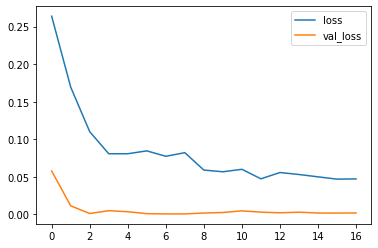

In [ ]:
loss_df = pd.DataFrame(regressor.history.history)
loss_df.plot()

Predicting the data

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_output.inverse_transform(y_pred)
y_pred

array([[308.1363 ],
       [307.49783],
       [307.0078 ],
       [306.55258],
       [305.97266],
       [305.2299 ],
       [304.4612 ],
       [303.71393],
       [303.12393],
       [302.70093]], dtype=float32)

In [ ]:
y_test=y_test.reshape(-1,1)
y_test = sc_output.inverse_transform(y_test)

In [ ]:
np.concatenate((y_test,y_pred), axis =1)

array([[318.62011719, 308.1362915 ],
       [308.10574341, 307.49783325],
       [307.35827637, 307.0078125 ],
       [301.62771606, 306.55258179],
       [303.87011719, 305.97265625],
       [304.01959229, 305.22988892],
       [296.7442627 , 304.46121216],
       [294.70120239, 303.71392822],
       [295.04998779, 303.12393188],
       [292.5       , 302.70092773]])

Visualizing the data

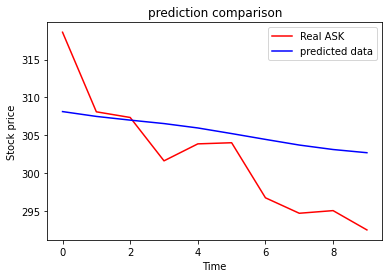

In [ ]:
plt.plot(y_test, color = 'red', label='Real ASK')
plt.plot(y_pred, color = 'blue', label='predicted data')
plt.title('prediction comparison')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

Calculating the ME(Mean absolute error) and RMSE(Root meansquare error)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
ME = mean_absolute_error(y_test, y_pred)

In [ ]:
100 - ME/np.mean(y_test)*100

98.19081247139731

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE**.5
RMSE

6.712457129954919

In [ ]:
100-RMSE/np.mean(y_test)*100

97.77924179247259

In [ ]:
for i in range(0,len(y_test)):
  print(100-RMSE/y_test[i]*100)

[97.89327266]
[97.82137877]
[97.81608057]
[97.77458875]
[97.79101111]
[97.79209719]
[97.73796566]
[97.72228377]
[97.72497631]
[97.70514286]


Predicting the next value

In [ ]:
dataset_total = new_data

In [ ]:

#getting only last three actual data to predict the forth one
inputs = dataset_total.iloc[len(dataset_total)-week:,:column].values
inputs = sc.transform(inputs)
next_day_value=[]
next_day_value.append(inputs)
next_day_value = np.array(next_day_value)

predicted_data = regressor.predict(next_day_value)
predicted_data = sc_output.inverse_transform(predicted_data)

In [ ]:
predicted_data

array([[302.1389]], dtype=float32)